<a href="https://colab.research.google.com/github/RaeHickel/DeeplearningAssign/blob/main/DeepLearning_Assignment_Raghda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


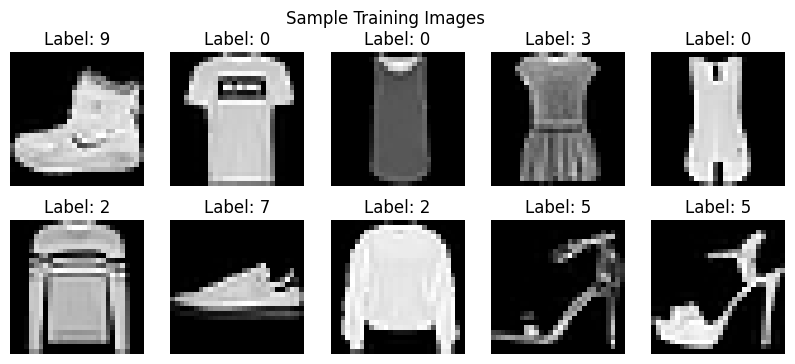

In [3]:
# Show some training samples
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Sample Training Images")
plt.show()

In [4]:
# Normalize pixel values
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Reshape for dense layers (flatten images)
X_train_flat = X_train.reshape(-1, 28 * 28)
X_test_flat = X_test.reshape(-1, 28 * 28)

print("Flattened training data shape:", X_train_flat.shape)

Flattened training data shape: (60000, 784)


In [5]:
print(X_train.shape)
print(X_train_flat.shape)

(60000, 28, 28)
(60000, 784)


In [6]:
# Basic Sequential model
model = keras.Sequential([
    layers.Input(shape=(28*28,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Compile with SGD optimizer
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Train the model and save history
history = model.fit(
    X_train_flat, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6620 - loss: 1.1073 - val_accuracy: 0.8109 - val_loss: 0.5741
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8153 - loss: 0.5507 - val_accuracy: 0.8152 - val_loss: 0.5150
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8301 - loss: 0.4953 - val_accuracy: 0.8367 - val_loss: 0.4710
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8446 - loss: 0.4541 - val_accuracy: 0.8435 - val_loss: 0.4541
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8462 - loss: 0.4422 - val_accuracy: 0.8478 - val_loss: 0.4385
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8542 - loss: 0.4241 - val_accuracy: 0.8512 - val_loss: 0.4283
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8556 - loss: 0.4160 - val_accuracy: 0.8404 - val_loss: 0.4428
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8607 - loss: 0

Somehow running the cell three times meant it continued with the same accuracy & loss from the last epoch of the last iteration

In [9]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test_flat, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

313/313 - 0s - 1ms/step - accuracy: 0.8740 - loss: 0.3658
Test accuracy: 0.8740
Test loss: 0.3658


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step
Classification               precision    recall  f1-score   support

           0       0.89      0.70      0.78      1000
           1       0.98      0.96      0.97      1000
           2       0.81      0.79      0.80      1000
           3       0.85      0.92      0.88      1000
           4       0.85      0.74      0.79      1000
           5       0.97      0.95      0.96      1000
           6       0.61      0.81      0.70      1000
           7       0.93      0.96      0.94      1000
           8       0.97      0.96      0.96      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.88     10000
weighted avg       0.88      0.87      0.88     10000



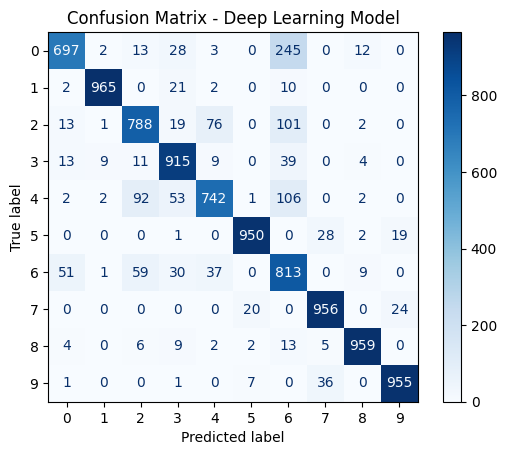

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report

# Predict labels for the test set using the deep model
y_pred_deep = np.argmax(model.predict(X_test_flat), axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_deep)
print("Classification",classification_report(y_test, y_pred_deep))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Deep Learning Model")
plt.show()

In [11]:
# Deeper network with more neurons
deep_model = keras.Sequential([
    layers.Input(shape=(28*28,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

deep_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# # Compile with SGD optimizer
# deep_model.compile(optimizer='sgd',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# Compile with Adam optimizer
deep_model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])



In [13]:
# Train the model and save history
history = deep_model.fit(
    X_train_flat, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7714 - loss: 0.6371 - val_accuracy: 0.8380 - val_loss: 0.4529
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8560 - loss: 0.3884 - val_accuracy: 0.8618 - val_loss: 0.3941
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8707 - loss: 0.3458 - val_accuracy: 0.8774 - val_loss: 0.3396
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8821 - loss: 0.3104 - val_accuracy: 0.8821 - val_loss: 0.3264
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8908 - loss: 0.2897 - val_accuracy: 0.8809 - val_loss: 0.3280
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8981 - loss: 0.2730 - val_accuracy: 0.8818 - val_loss: 0.3329
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9006 - loss: 0.2627 - val_accuracy: 0.8878 - val_loss: 0.3200
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9066 - loss: 0

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_model(hidden_layers, input_shape=(28*28,), num_classes=10,
                activation='relu', output_activation='softmax'):
    model = keras.Sequential()
    model.add(layers.Input(shape=input_shape))

    # Add hidden layers
    for units in hidden_layers:
        model.add(layers.Dense(units, activation=activation))

    # Output layer
    model.add(layers.Dense(num_classes, activation=output_activation))
    return model


model1 = build_model([256, 128, 64, 32])    # 3 hidden layers
model2 = build_model([500, 250, 125, 62, 31])             # 1 hidden layer with 500 neurons
model3 = build_model([128, 256, 512, 1124])        # 2 hidden layers increasing
model4 = build_model([])                # No hidden layers, just direct output


In [15]:
# Compile with adam optimizer
model1.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
model2.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
model3.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
model4.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

In [ ]:
# Train the model and save history
history = model1.fit(
    X_train_flat, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2
)
# Train the model and save history
history = model2.fit(
    X_train_flat, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2
)
# Train the model and save history
history = model3.fit(
    X_train_flat, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2
)
# Train the model and save history
history = model4.fit(
    X_train_flat, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7462 - loss: 0.7247 - val_accuracy: 0.8442 - val_loss: 0.4352
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8582 - loss: 0.3888 - val_accuracy: 0.8651 - val_loss: 0.3775
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8776 - loss: 0.3359 - val_accuracy: 0.8573 - val_loss: 0.4004
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8803 - loss: 0.3240 - val_accuracy: 0.8782 - val_loss: 0.3365
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8877 - loss: 0.3049 - val_accuracy: 0.8766 - val_loss: 0.3347
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8963 - loss: 0.2778 - val_accuracy: 0.8759 - val_loss: 0.3439
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9014 - loss: 0.2686 - val_accuracy: 0.8813 - val_loss: 0.3339
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9034 - loss: 0

I had already done SGD & Adam, so I will do the others

In [ ]:
deep_model2 = keras.Sequential([
    layers.Input(shape=(28*28,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile with RMSprop optimizer
deep_model.compile(optimizer='rmsprop',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

In [ ]:
history = model2.fit(
    X_train_flat, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

In [ ]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test_flat, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report

# Predict labels for the test set using the deep model
y_pred_deep = np.argmax(model.predict(X_test_flat), axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_deep)
print("Classification",classification_report(y_test, y_pred_deep))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Deep Learning Model")
plt.show()

In [ ]:
from tensorflow.keras import optimizers
# Compile with Momentum SGD Optimizer
optimizer = optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False)


In [ ]:

# Compile with Nesterov Accelerated Gradient Optimizer
# optimizer = optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

# Compile
deep_model2.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train
deep_model2.fit(X_train_flat, y_train, batch_size=64, epochs=5)

In [ ]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test_flat, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report

# Predict labels for the test set using the deep model
y_pred_deep = np.argmax(model.predict(X_test_flat), axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_deep)
print("Classification",classification_report(y_test, y_pred_deep))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Deep Learning Model")
plt.show()

Since the data already came split into train & test, I will split the train into train and validate

In [ ]:
from sklearn.model_selection import train_test_split

X_train_flat, X_val, y_train_flat, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.1,
    random_state=42
)

In [ ]:
from tensorflow.keras import regularizers
import itertools

def build_model(
    num_layers,
    units,
    activation,
    weight_decay,
    learning_rate,
    optimizer_name
):
    model_grid = keras.Sequential()
    model_grid.add(layers.Input(shape=(28*28,)))

    for _ in range(num_layers):
        model_grid.add(layers.Dense(
            units,
            activation=activation,
            kernel_regularizer=regularizers.l2(weight_decay)
        ))

    model_grid.add(layers.Dense(10, activation='softmax'))

    # Choose optimizer
    if optimizer_name == 'SGD':
        optimizer = optimizers.SGD(learning_rate=learning_rate, momentum=0.0, nesterov=False)
    elif optimizer_name == 'Momentum':
        optimizer = optimizers.SGD(learning_rate=learning_rate, momentum=0.9, nesterov=False)
    elif optimizer_name == 'Nesterov':
        optimizer = optimizers.SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True)
    elif optimizer_name == 'RMSprop':
        optimizer = optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer_name == 'Adam':
        optimizer = optimizers.Adam(learning_rate=learning_rate)
    else:
        raise ValueError(f"Unknown optimizer: {optimizer_name}")

    model_grid.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [ ]:
# Define hyperparameter values to test
epochs_list = [5, 10]
num_layers_list = [3, 4]
units_list = [32, 64]
weight_decay_list = [0, 0.0005]
learning_rate_list = [1e-3, 1e-4]
optimizer_list = ['SGD', 'Momentum']
batch_size_list = [32, 64]
activation_list = ['relu', 'tanh']

# Track best result
best_val_acc = 0
best_params = None

# Create combinations
param_grid = itertools.product(
    epochs_list,
    num_layers_list,
    units_list,
    weight_decay_list,
    learning_rate_list,
    optimizer_list,
    batch_size_list,
    activation_list
)

# Loop
for params in param_grid:
    epochs, num_layers, units, weight_decay, learning_rate, optimizer_name, batch_size, activation = params

    model_grid = build_model(
        num_layers=num_layers,
        units=units,
        activation=activation,
        weight_decay=weight_decay,
        learning_rate=learning_rate,
        optimizer_name=optimizer_name
    )

    history = model_grid.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        verbose=0
    )

    val_acc = max(history.history['val_accuracy'])

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_params = params
        print(f"New best accuracy: {val_acc:.4f} with params: {params}")


In [ ]:
print(X_train_flat.shape)   # should be (60000, 784)
print(y_train.shape)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

Model Regularization and Optimization

In [ ]:
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])
